This repository will use the public dataset of UCI Machine Learning Repository. 
URL is https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

The objective of this projects is to try to outperform current papers and work with the same repository.

 - Paper to outperform: 10.1109/CONFLUENCE.2016.7508132 
 - Works are available in https://www.kaggle.com/mansoordaku/ckdiseasekaggle

Also after cleaning the data set of missing values and other inconsistences, the resultant data set will be upload to Kaggle

**Outline of works**

 1. Exploratory Data Analysis (EDA)
 
    1. Load data and summarizes
    2. Tables and DataViz
    3. Data missing handle
    4. Hypothesis testing 
    
     
 2. Comparison different Classifiers (LogReg, SVM, DT, Bagging, RandomForest, KNN or ANN)
 
 
 3. Comparsion to aforementioned paper and other devs in kaggle
 
 
 4. Interpretability by showing features of importance in the oucomes

To structure this work and followed a proper methodology that saves to miss any important steps in delivering the outcomes, we will follow the IBM foundational data science methodology available here : [https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science](https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science) ; with the following steps:

 1. Business understanding
 2. Analytical approach
 3. Data requirements
 4. Data collection
 5. Data understanding
 6. Data preparation
 7. Modelling
 8. Evaluation
 9. Deploying 
 10. Feedback 

Due to the academic purpose of the work based on an existing datasource, some of the steps will be lightly covered.

## 1. Business understanding

Here the word business might not be totally adequate since we are not trying to get revenue from anything, however, the subtle idea here is to define the problem to solve. So, what we pursue from this work is to solve the following problem: **Predict  chronic kidney disease (CKD) on individuals**

## 2. Analytical approach

Since we are trying to predict the onset of a disease CKD, the key word is to predict if a certain indidivual considering a set of feaures *has or has not* CKD. Thus we are in front of a **classification problem** with a target that takes a binary value. Therefore, from now on we will work in a classification model.

## 3. Data requirements

Data needed to peform this work will consist of a set of features relative to patients and a target value that says Yes/No the patient suffers from CKD. The set of feautures conrrespond to one patient withouth being referred to a certain timestamp. So the classification model will predict CKD disease in terms of "absolute" measures

In [1]:
## All necessary modules as well as different functions that will be used in this work are explicit here.
#import all neccesary modules
import pandas as pd
import numpy as np
import arff
import seaborn as sn
import matplotlib.pyplot as plt


%matplotlib inline 
def df_values(df):
    for i in range(0, len(df.columns)):
        print("*****start of feature ", df.columns[i], "*************************")
        print (df.iloc[:,i].value_counts())       
        print ("*****end of feature ", df.columns[i], "************************** \n")

def info_adhoc(df):
    d=(df.count()/len(df))*100
    df_info=pd.DataFrame(data=d, columns=['% non-null values'])
    df_info['non-null values']=df.count()
    df_info['dtype']=df.dtypes
    return df_info
    
    

## 4. Data collection

This repository will use the public dataset of UCI Machine Learning Repository. URL is https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

In [2]:
#importing file into a pandas dataframe

#arff importing doesn't work
#path_data='Chronic_Kidney_Disease/chronic_kidney_disease.arff'
#dataset = arff.load(open(path_data, 'rt'))
#data = pd.DataFrame(dataset)

# As being unable to extract data from it original source, the csv file is downloaded from
#https://www.kaggle.com/mansoordaku/ckdisease
path_data='Chronic_Kidney_Disease/kidney_disease.csv'
df=pd.read_csv(path_data)

## 5. Data understanding (Exploratory Data Analysis)


The data understanding phase will consist tackle the Exploratory Data Analysis (EDA) approach composed of the following points:
 
   1. Summarizes data
   2. Tables and DataViz
   3. Data missing handle
   4. Hypothesis testing 

Other approach taken from IBM Data Science course on Coursera is to follow these steprs
1. Summarize data
2. Bivariable correlation
3. Histograms
    

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# Lets see summary of data
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

The features of the dataset seems to be well defined as well as the target features is explicitly name as **"classification"**. The values of this colum are *ckd*: the patient has ckd; and *notckd*: the patient has not ckd

In [3]:
#Set column id as index
df.set_index('id', inplace=True)

In [8]:
# Lets see summary of data
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
#Looking at describe table we can see that there are some missing features that apparently have numerical values. Let's see the
#type of these features, apart from the proportion of non-null values
info_adhoc(df)

,% non-null values,non-null values,dtype
age,97.75,391,float64
bp,97.00,388,float64
sg,88.25,353,float64
al,88.50,354,float64
su,87.75,351,float64
rbc,62.00,248,object
pc,83.75,335,object
pcc,99.00,396,object
ba,99.00,396,object
bgr,89.00,356,float64


- The following features are defined as numerical although the dtype is coded as object, namely: *pcv, wc, rc*
- The following features are defined as nomimal or categorical with string or boolean values although the dtype is coded as object, namely: *rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane*

In [10]:
#Lets correct pcv,wc and rc dtype
pd.to_numeric(df['pcv'])             



ValueError: Unable to parse string "	?" at position 66

In [11]:
#As seen above, there are some strange caracters in pcv feature, therefore we will explore every features' value to homogeneize it.
df_values(df)

*****start of feature  age *************************
60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, Length: 76, dtype: int64
*****end of feature  age ************************** 

*****start of feature  bp *************************
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
180.0      1
140.0      1
Name: bp, dtype: int64
*****end of feature  bp ************************** 

*****start of feature  sg *************************
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
*****end of feature  sg ************************** 

*****start of feature  al *************************
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64
*****end of feature  al ************************** 

*****start of feature  su *************************
0.0    290
2.0     18
3.0     14
1.0   

In [4]:
#Some fetures content seems to have the character \t.
#Let's remove such character for the sake of consistency
for i in range(0, len(df.columns)):           
    if df.dtypes[i]==np.object:        
        df.iloc[:,i] = df.iloc[:,i].str.replace(r'\t','')
        df.iloc[:,i] = df.iloc[:,i].str.replace(r' ','')        
df_values(df)

*****start of feature  age *************************
60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, Length: 76, dtype: int64
*****end of feature  age ************************** 

*****start of feature  bp *************************
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
180.0      1
140.0      1
Name: bp, dtype: int64
*****end of feature  bp ************************** 

*****start of feature  sg *************************
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
*****end of feature  sg ************************** 

*****start of feature  al *************************
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64
*****end of feature  al ************************** 

*****start of feature  su *************************
0.0    290
2.0     18
3.0     14
1.0   

In [5]:
#Lets convert pcv,wc and rc dtype to float64 dtype and if any strange character appears it turns to NAN
df['pcv']=pd.to_numeric(df['pcv'],errors='coerce')
df['wc']=pd.to_numeric(df['wc'],errors='coerce')   
df['rc']=pd.to_numeric(df['rc'],errors='coerce')   


In [6]:
#Lets convert rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane to category
#also features sg, al, su will be set to category
features_to_category= ['sg','al','su','rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i in range(len(features_to_category)):
    df.loc[:,features_to_category[i]]=df.loc[:,features_to_category[i]].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             391 non-null    float64 
 1   bp              388 non-null    float64 
 2   sg              353 non-null    category
 3   al              354 non-null    category
 4   su              351 non-null    category
 5   rbc             248 non-null    category
 6   pc              335 non-null    category
 7   pcc             396 non-null    category
 8   ba              396 non-null    category
 9   bgr             356 non-null    float64 
 10  bu              381 non-null    float64 
 11  sc              383 non-null    float64 
 12  sod             313 non-null    float64 
 13  pot             312 non-null    float64 
 14  hemo            348 non-null    float64 
 15  pcv             329 non-null    float64 
 16  wc              294 non-null    float64 
 17  rc              

In [7]:
#lets convert as well the target feature to categorical value
df['classification']=df['classification'].astype('category')


In [16]:
#Understanding data phase is perform again
df.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.00,354.0,351.0,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,5.00,6.0,6.0,2,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,1.02,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,106.00,199.0,290.0,201,259,354,374,NaN,...,NaN,NaN,NaN,251,261,364,317,323,339,250
mean,51.483376,76.469072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Show the describe() of only numeric features
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [18]:
#Show the describe of category features
df.describe(include='category')

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,353.00,354.0,351.0,248,335,396,396,398,398,398,399,399,399,400
unique,5.00,6.0,6.0,2,2,2,2,2,2,2,2,2,2,2
top,1.02,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,106.00,199.0,290.0,201,259,354,374,251,261,364,317,323,339,250


In [8]:
#Defining a strategy for handling the data missing. First we adopt
#complete case strategy where all NaN are cleaned by using drop_na
# Following onenote notebook of work plan for KCD is the step 1.a
df_totalclean=df.dropna()
info_adhoc(df_totalclean)



,% non-null values,non-null values,dtype
age,100.0,158,float64
bp,100.0,158,float64
sg,100.0,158,category
al,100.0,158,category
su,100.0,158,category
rbc,100.0,158,category
pc,100.0,158,category
pcc,100.0,158,category
ba,100.0,158,category
bgr,100.0,158,float64


In [26]:
#1.b Imputation of missing values.
for i in range (len(df.columns)+1):
    df_partialclean=df.dropna(thresh=i)
    print('Shape of df_partialclean with threshold {} is: {}'.format(i,str(df_partialclean.shape[0])))

Shape of df_partialclean with threshold 0 is: 400
Shape of df_partialclean with threshold 1 is: 400
Shape of df_partialclean with threshold 2 is: 400
Shape of df_partialclean with threshold 3 is: 400
Shape of df_partialclean with threshold 4 is: 400
Shape of df_partialclean with threshold 5 is: 400
Shape of df_partialclean with threshold 6 is: 400
Shape of df_partialclean with threshold 7 is: 400
Shape of df_partialclean with threshold 8 is: 400
Shape of df_partialclean with threshold 9 is: 400
Shape of df_partialclean with threshold 10 is: 400
Shape of df_partialclean with threshold 11 is: 400
Shape of df_partialclean with threshold 12 is: 400
Shape of df_partialclean with threshold 13 is: 400
Shape of df_partialclean with threshold 14 is: 400
Shape of df_partialclean with threshold 15 is: 393
Shape of df_partialclean with threshold 16 is: 389
Shape of df_partialclean with threshold 17 is: 377
Shape of df_partialclean with threshold 18 is: 369
Shape of df_partialclean with threshold 1

In [24]:
#looking at the above result deciding on threshold=16 I would only lost 11 rows
#It seems reasonable a let the rest to impute.
df_totalclean_threshold=df.dropna(thresh=16)
info_adhoc(df_totalclean_threshold)

,% non-null values,non-null values,dtype
age,97.943445,381,float64
bp,97.172237,378,float64
sg,89.974293,350,category
al,90.231362,351,category
su,89.460154,348,category
rbc,63.496144,247,category
pc,85.604113,333,category
pcc,98.971722,385,category
ba,98.971722,385,category
bgr,89.717224,349,float64


In [ ]:
########Step 1.b.i: Bayesian imputation
#to decide an imputation estrategy lets look at hist of numerical attributes
pd.plotting.scatter_matrix(df_totalclean_threshold)


In [ ]:
#numerical variables do not seem to have a normal distr then imputation strategy would be median
numerical_features=['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
df_totalclean_threshold_imp_num=df_totalclean_threshold[numerical_features]
num_imputer=SimpleImputer(strategy='median')
num_imputer.fit(df_totalclean_threshold_imp_num)
df_imp_num=num_imputer.transform(df_totalclean_threshold_imp_num)
df_totalclean_threshold_imp_num=pd.DataFrame(df_imp_num, columns=df_totalclean_threshold_imp_num.columns)

In [ ]:
#########Step 1.b.ii: Bayesian imputation for category attributes
df_totalclean_threshold_imp_cat=df_totalclean_threshold[features_to_category]
#first approach: assign unkown category to NaN values
cat_unk_imputer=SimpleImputer(strategy='constant', fill_value='unknown')
cat_unk_imputer.fit(df_totalclean_threshold_imp_cat)
imp_cat_unk=cat_unk_imputer.transform(df_totalclean_threshold_imp_cat)
df_totalclean_threshold_imp_cat_unk=pd.DataFrame(imp_cat_unk, columns=df_totalclean_threshold_imp_cat.columns)
df_values(df_totalclean_threshold_imp_cat_unk)

#second_approach:assign most_frequent strategy

cat_mostfq_imputer=SimpleImputer(strategy='most_frequent')
cat_mostfq_imputer.fit(df_totalclean_threshold_imp_cat)
imp_cat_mostfq=cat_mostfq_imputer.transform(df_totalclean_threshold_imp_cat)
df_totalclean_threshold_imp_cat_mostfq=pd.DataFrame(imp_cat_mostfq, columns=df_totalclean_threshold_imp_cat.columns)
df_values(df_totalclean_threshold_imp_cat_mostfq)

In [ ]:
#composing the entire dataframe by concating num and cat attributes
df_totalclean_threshold_imp_unk=pd.concat([df_totalclean_threshold_imp_num,df_totalclean_threshold_imp_cat_unk,df_totalclean_threshold['classification']], axis=1)
df_totalclean_threshold_imp_mostfq=pd.concat([df_totalclean_threshold_imp_num,df_totalclean_threshold_imp_cat_mostfq, df_totalclean_threshold['classification']], axis=1)


In [29]:
mask=df.dtypes!='category'

In [28]:
#By calling the function created info_adhoc(), it can be seen that some features
# have missing values in a considerable proportion. Thus, we will see the kind of 
# correlation between values to synthetize features values using regression
import seaborn as sns

df_numerical=df[df.dtypes!='category']
sns.pairplot (df_numerical, 
              hue='classification',
              height=3,
             kind='reg')


C:\Users\k5000751\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df_cat_into_num=df
cat_columns=df_cat_into_num.select_dtypes(['category']).columns
cat_columns
df_cat_into_num[cat_columns]=df_cat_into_num[cat_columns].apply(lambda x:x.cat.codes)
df_cat_into_num=df_cat_into_num.astype('float64')
sns.pairplot (df_cat_into_num, hue='classification')

In [ ]:
df_cat_into_num.info()


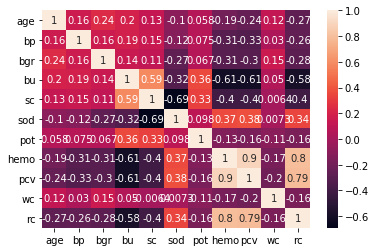

In [20]:
#let's print a correlation matrix with a heatmap
corrMatrix=df.corr()
sn.heatmap(corrMatrix,annot=True)
plt.show()
#watch out because correlation matrix only serve to numeric values

In [32]:
df_clean=df.dropna()
(df_clean.count()/len(df_clean))*100

age               100.0
bp                100.0
sg                100.0
al                100.0
su                100.0
rbc               100.0
pc                100.0
pcc               100.0
ba                100.0
bgr               100.0
bu                100.0
sc                100.0
sod               100.0
pot               100.0
hemo              100.0
pcv               100.0
wc                100.0
rc                100.0
htn               100.0
dm                100.0
cad               100.0
appet             100.0
pe                100.0
ane               100.0
classification    100.0
dtype: float64

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [34]:
df_values(df_clean)

*****start of feature  age *************************
59.0    8
48.0    7
55.0    7
60.0    6
30.0    5
73.0    5
56.0    5
23.0    4
42.0    4
64.0    4
33.0    4
47.0    4
43.0    4
57.0    4
58.0    4
52.0    4
46.0    4
63.0    4
50.0    3
44.0    3
41.0    3
71.0    3
62.0    3
45.0    3
69.0    3
61.0    3
34.0    3
70.0    2
49.0    2
40.0    2
68.0    2
38.0    2
51.0    2
66.0    2
29.0    2
32.0    2
39.0    2
37.0    2
25.0    2
35.0    2
20.0    1
75.0    1
53.0    1
36.0    1
15.0    1
80.0    1
79.0    1
72.0    1
28.0    1
74.0    1
21.0    1
22.0    1
12.0    1
65.0    1
6.0     1
24.0    1
83.0    1
17.0    1
Name: age, dtype: int64
*****end of feature  age ************************** 

*****start of feature  bp *************************
80.0     63
60.0     40
70.0     37
90.0      9
100.0     7
110.0     1
50.0      1
Name: bp, dtype: int64
*****end of feature  bp ************************** 

*****start of feature  sg *************************
1.020    61
1.025    61
1